## Dataset 

Nhấn vào link này để tải dataset (5GB): https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset

Giải nén vào thư mục asl_dataset, gồm 2 thư mục con là Train và Test

In [10]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
from tqdm import tqdm
from pathlib import Path
import os

import random
from PIL import Image
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

In [11]:
import torch
from torch import nn

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

2.1.1+cu121
cuda


## Dataset 

Duyệt qua để check số lượng ảnh và tập con trong bộ dataset

In [12]:
pwd

'd:\\STUDYING\\CS338\\CS338-ASL'

In [13]:
# Setup path to data folder
image_path = Path("asl-dataset\Train")

def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 29 directories and 0 images in 'asl-dataset\Train'.
There are 0 directories and 8458 images in 'asl-dataset\Train\A'.
There are 0 directories and 8309 images in 'asl-dataset\Train\B'.
There are 0 directories and 8146 images in 'asl-dataset\Train\C'.
There are 0 directories and 7629 images in 'asl-dataset\Train\D'.
There are 0 directories and 6836 images in 'asl-dataset\Train\del'.
There are 0 directories and 7744 images in 'asl-dataset\Train\E'.
There are 0 directories and 8031 images in 'asl-dataset\Train\F'.
There are 0 directories and 7844 images in 'asl-dataset\Train\G'.
There are 0 directories and 7906 images in 'asl-dataset\Train\H'.
There are 0 directories and 7953 images in 'asl-dataset\Train\I'.
There are 0 directories and 7503 images in 'asl-dataset\Train\J'.
There are 0 directories and 7876 images in 'asl-dataset\Train\K'.
There are 0 directories and 7939 images in 'asl-dataset\Train\L'.
There are 0 directories and 7900 images in 'asl-dataset\Train\M'.
There are 0 

In [14]:
# import os

# data_dir = 'asl_dataset/Train'

# # Duyệt qua từng thư mục con
# for subdir in os.listdir(data_dir):
#     subdir_path = os.path.join(data_dir, subdir)
#     if os.path.isdir(subdir_path):
#         # Lấy danh sách tất cả các tệp trong thư mục con
#         files = os.listdir(subdir_path)
#         # Lấy chỉ 400 ảnh đầu tiên, nếu có ít hơn thì lấy tất cả
#         files_to_keep = files[:1000] if len(files) > 1000 else files
#         # Xóa các tệp không được lấy
#         for file in files:
#             if file not in files_to_keep:
#                 os.remove(os.path.join(subdir_path, file))

In [15]:
images = []
labels = []
for subfolder in tqdm(os.listdir('asl-dataset\Train')):
    subfolder_path = os.path.join('asl-dataset\Train', subfolder)
    if not os.path.isdir(subfolder_path) or subfolder=='asl_dataset':
        continue
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 29/29 [00:00<00:00, 40.46it/s]


,image,label
0,asl-dataset\Train\A\1.jpg,A
1,asl-dataset\Train\A\10.jpg,A
2,asl-dataset\Train\A\100.jpg,A
3,asl-dataset\Train\A\101.jpg,A
4,asl-dataset\Train\A\102.jpg,A
...,...,...
223069,asl-dataset\Train\Z\z_9_rotate_5.jpeg,Z
223070,asl-dataset\Train\Z\z_9_rotate_6.jpeg,Z
223071,asl-dataset\Train\Z\z_9_rotate_7.jpeg,Z
223072,asl-dataset\Train\Z\z_9_rotate_8.jpeg,Z


## Dataset visualization

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5012\4095864232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set1')


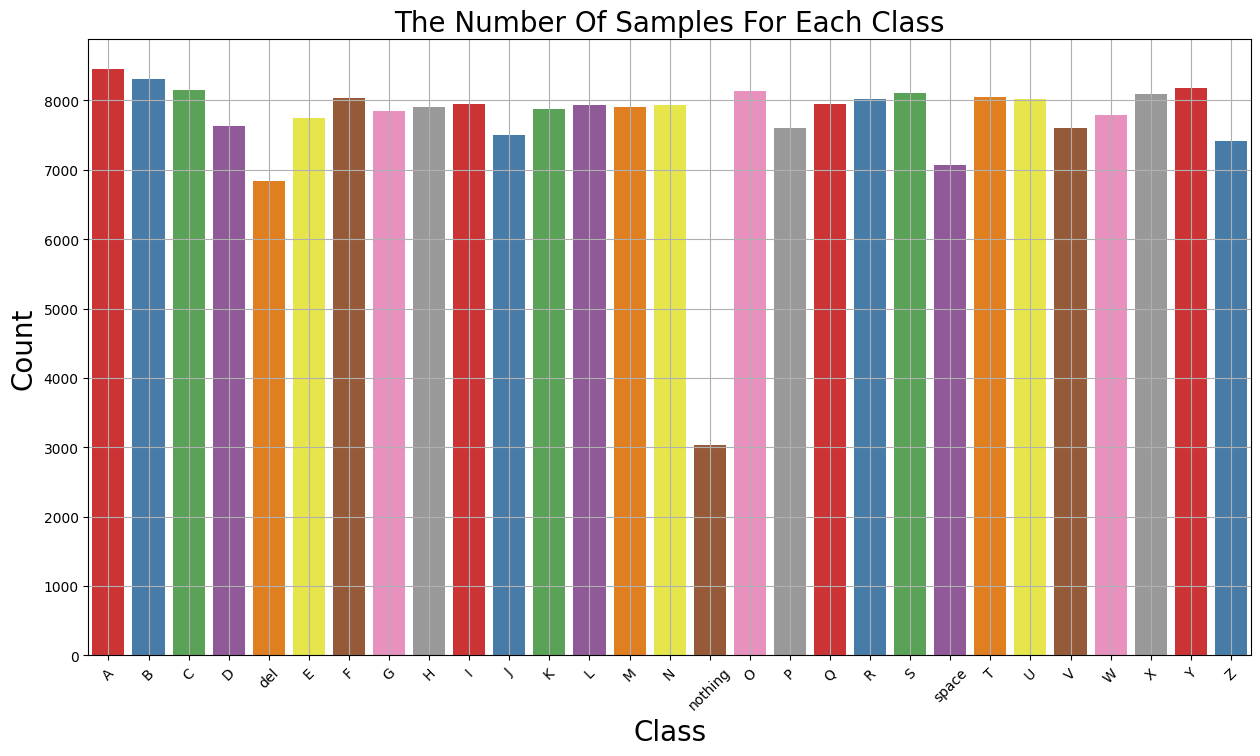

In [21]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Sample image visualizaion

Random image path: asl-dataset\Train\nothing\nothing2865.jpg
Image Class: nothing
Image Height: 200
Image Width: 200


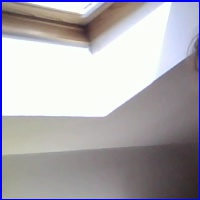

In [22]:
# random.seed(42)
image_path = Path("asl-dataset")
image_path_list = list(image_path.glob("*/*/*.jpg"))
# print(len(image_path_list))
random_image_path = random.choice(image_path_list)
# print(random_image_path)
# the image class is the name of the directory where iamges resides
image_class = random_image_path.parent.stem
# print(image_class)

img = Image.open(random_image_path)

# Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image Height: {img.height}')
print(f'Image Width: {img.width}')
img

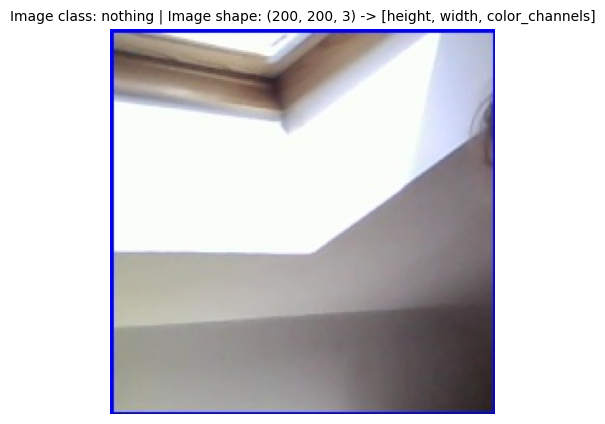

In [23]:
# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
fig = plt.figure(figsize=(6, 5))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]", fontsize = 10)
plt.axis(False)
plt.show()

## Transforming data

In [24]:
# Transform image
data_transform = transforms.Compose([
    transforms.Resize(size = (128, 128)),         # Resize our images to 224x224
    transforms.ToTensor()
])

transformed_data = data_transform(img)
transformed_data, transformed_data.shape, transformed_data.dtype

(tensor([[[0.0039, 0.0275, 0.0314,  ..., 0.0235, 0.0314, 0.0118],
          [0.0118, 0.3098, 0.4353,  ..., 0.4863, 0.4824, 0.2000],
          [0.0196, 0.4157, 0.5961,  ..., 0.6902, 0.6784, 0.2941],
          ...,
          [0.0196, 0.4588, 0.6549,  ..., 0.1882, 0.1569, 0.0784],
          [0.0196, 0.4549, 0.6431,  ..., 0.1569, 0.1294, 0.0627],
          [0.0039, 0.1922, 0.2824,  ..., 0.0784, 0.0667, 0.0275]],
 
         [[0.0157, 0.0039, 0.0078,  ..., 0.0157, 0.0118, 0.0078],
          [0.0118, 0.2824, 0.4118,  ..., 0.5059, 0.4863, 0.2039],
          [0.0157, 0.3961, 0.5686,  ..., 0.7216, 0.6941, 0.2941],
          ...,
          [0.0157, 0.4706, 0.6627,  ..., 0.1451, 0.1255, 0.0745],
          [0.0118, 0.4588, 0.6549,  ..., 0.1255, 0.1137, 0.0667],
          [0.0118, 0.1961, 0.2824,  ..., 0.0745, 0.0706, 0.0549]],
 
         [[0.9765, 0.9098, 0.8667,  ..., 0.8824, 0.9137, 0.9490],
          [0.9216, 0.8588, 0.7569,  ..., 0.8863, 0.9255, 0.8314],
          [0.8745, 0.7451, 0.5686,  ...,

## Loading data with ImageFolder and Split into Train and Test Data

In [26]:
source_dir = 'asl-dataset/Train'

source_data = datasets.ImageFolder(root = source_dir,
                                  transform = data_transform, # Transforms input data into tensors
                                  target_transform = None)    # Transform labels into none

source_data

Dataset ImageFolder
    Number of datapoints: 223074
    Root location: asl-dataset/Train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [ ]:
from torch.utils.data import random_split

train_size = int(0.8 * len(source_data))
test_size = len(source_data) - train_size

# Split the dataset into train and test sets
train_data, test_data = random_split(source_data, [train_size, test_size])

print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 178459
Test set size: 44615


In [28]:
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [27]:
# Get class names as list and dict 
class_names = source_data.classes
class_dict = source_data.class_to_idx
class_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [ ]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]

img, img.dtype, label, type(label), class_names[label]

(tensor([[[0.0000, 0.0275, 0.0353,  ..., 0.0353, 0.0314, 0.0039],
          [0.0275, 0.1216, 0.1686,  ..., 0.5569, 0.5333, 0.2235],
          [0.0431, 0.1686, 0.2275,  ..., 0.7922, 0.7686, 0.3373],
          ...,
          [0.0196, 0.3843, 0.5490,  ..., 0.5922, 0.5647, 0.2549],
          [0.0157, 0.3765, 0.5373,  ..., 0.5647, 0.5412, 0.2392],
          [0.0078, 0.1569, 0.2353,  ..., 0.2392, 0.2314, 0.0980]],
 
         [[0.0118, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0157],
          [0.0078, 0.0824, 0.1255,  ..., 0.4980, 0.4784, 0.2078],
          [0.0118, 0.1294, 0.1882,  ..., 0.7137, 0.7020, 0.2980],
          ...,
          [0.0196, 0.3922, 0.5569,  ..., 0.5490, 0.5176, 0.2275],
          [0.0118, 0.3804, 0.5412,  ..., 0.5373, 0.5098, 0.2196],
          [0.0118, 0.1647, 0.2392,  ..., 0.2392, 0.2275, 0.1098]],
 
         [[0.9804, 0.9294, 0.8941,  ..., 0.8588, 0.8824, 0.9176],
          [0.9216, 0.6588, 0.4824,  ..., 0.8039, 0.8667, 0.7843],
          [0.8706, 0.4745, 0.1922,  ...,

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)
img.shape, img_permute.shape

(torch.Size([3, 128, 128]), torch.Size([128, 128, 3]))

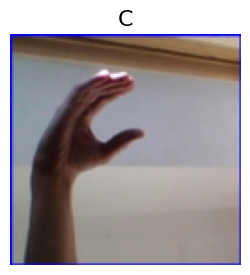

In [14]:
# Plot the image
plt.figure(figsize = (3, 3))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 16); 

## Turn loaded images into Dataloaders

In [4]:
# Train and test dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 192
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

NameError: name 'train_data' is not defined

In [16]:
# img, label = next(iter(train_dataloader))

# img.shape, label.shape     # {img.shape} -> [batch_size, color_channels, height, width]

(torch.Size([192, 3, 128, 128]), torch.Size([192]))

In [17]:
# !pip install efficientnet_pytorch torchinfo

In [18]:
from efficientnet_pytorch import EfficientNet
from torchinfo import summary

In [5]:
from efficientnet_pytorch import EfficientNet
from torchinfo import summary

num_classes = len(class_names)    # Number of classes

# Instantiate the EfficientNet model
model = EfficientNet.from_pretrained('efficientnet-b0').to(device)
model._fc = nn.Linear(model._fc.in_features, num_classes)  

summary(model=model,
        input_size=(192, 3, 128, 128),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

NameError: name 'class_names' is not defined

In [20]:
model(img.to(device))

tensor([[-0.0764,  0.0382,  0.1988,  ..., -0.2306,  0.0049,  0.0854],
        [ 0.1659,  0.6772,  0.7007,  ...,  0.4550, -0.0125, -0.0816],
        [-0.4074, -0.2728,  0.3607,  ...,  0.6225,  0.0966, -0.6255],
        ...,
        [-0.1805,  0.0423,  0.0251,  ...,  0.1909,  0.0493, -0.1207],
        [-0.0865,  0.3366,  0.1830,  ..., -0.2494, -0.0011, -0.0617],
        [-0.0165, -0.0799, -0.1115,  ...,  0.0360, -0.0583,  0.1985]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

## Create Train/Test Loop Function

In [21]:
# def train_step(model, dataloader, loss_fn, optimizer):
#     model.train()
#     train_loss, train_acc = 0, 0

#     # Loop through data loader data batches
#     for batch, (X, y) in enumerate(dataloader):
#         X, y = X.to(device), y.to(device)
#         y_pred = model(X)

#         loss = loss_fn(y_pred, y)
#         train_loss += loss.item()

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Calculate and accumulate accuracy metric across all batches
#         y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
#         train_acc += (y_pred_class == y).sum().item()/len(y_pred)

#     # Adjust metrics to get average loss and accuracy per batch
#     train_loss = train_loss / len(dataloader)
#     train_acc = train_acc / len(dataloader)
#     return train_loss, train_acc

# def test_step(model, dataloader, loss_fn):
#     model.eval()
#     test_loss, test_acc = 0, 0

#     # Turn on inference
#     with torch.inference_mode():
#         for batch, (X, y) in enumerate(dataloader):
#             X, y = X.to(device), y.to(device)

#             test_pred_logits = model(X)
#             loss = loss_fn(test_pred_logits, y)
#             test_loss += loss.item()

#             # Calculate and accumulate accuracy
#             test_pred_labels = test_pred_logits.argmax(dim=1)
#             test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

#     # Adjust metrics to get average loss and accuracy per batch
#     test_loss = test_loss / len(dataloader)
#     test_acc = test_acc / len(dataloader)
#     return test_loss, test_acc

In [22]:
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):

  # Create a empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss":[],
             "test_acc": []}

  # Loop through training and testing steps for no of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       optimizer = optimizer,
                                       loss_fn = loss_fn)

    test_loss, test_acc = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

    print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} - Train acc: {(train_acc*100):.2f}% -  Test loss: {test_loss:.4f} - Test acc: {(test_acc*100):.2f}%')

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

## Train and Evaluate the Model

In [23]:
# Setup loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001)

In [24]:
# # Set random seed
# # torch.manual_seed(42)
# EPOCHS = 5

# # Start the timer
# from timeit import default_timer as timer
# start_time = timer()

# # Train model
# model_results = train(model = model,
#                       train_dataloader = train_dataloader,
#                       test_dataloader = test_dataloader,
#                       optimizer = optimizer,
#                       loss_fn = loss_fn,
#                       epochs = EPOCHS)

# # End the timer and print duration of training
# end_time = timer()
# print(f'Total Train Time: {end_time - start_time:.3f} seconds')

## Saving Model

In [25]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "ASL_HandSignLang_EfficientNetB0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [26]:
# # Save the model state dict
# print(f"Saving model to: {MODEL_SAVE_PATH}")
# torch.save(obj=model.state_dict(),
#            f=MODEL_SAVE_PATH)

## Plot loss curves and accuracy curves

In [27]:
# # Get the model key results
# model_results.keys()

In [28]:
# def plot_loss_curves(results):
#     """ Plots training curves of a results dictionary """

#     # Get results dictionary (training and test)
#     loss = results['train_loss']
#     test_loss = results['test_loss']
#     accuracy = results['train_acc']
#     test_accuracy = results['test_acc']

#     epochs = range(len(results['train_loss']))

#     plt.figure(figsize=(15, 4))

#     # Plot loss
#     plt.subplot(1, 2, 1)
#     plt.plot(epochs, loss, label='train_loss')
#     plt.plot(epochs, test_loss, label='test_loss')
#     plt.title('Loss')
#     plt.xlabel('Epochs')
#     plt.legend()

#     # Plot accuracy
#     plt.subplot(1, 2, 2)
#     plt.plot(epochs, accuracy, label='train_accuracy')
#     plt.plot(epochs, test_accuracy, label='test_accuracy')
#     plt.title('Accuracy')
#     plt.xlabel('Epochs')
#     plt.legend()

In [29]:
# plot_loss_curves(loaded_model)

## Making Predictions on Loaded Model

In [8]:
from efficientnet_pytorch import EfficientNet
from torchinfo import summary

num_classes = len(class_names)    # Number of classes

# Instantiate the EfficientNet model
model = EfficientNet.from_pretrained('efficientnet-b0').to(device)
model._fc = nn.Linear(model._fc.in_features, num_classes)  

summary(model=model,
        input_size=(192, 3, 128, 128),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

NameError: name 'class_names' is not defined

Load pretrained model nè

In [30]:
loaded_model = EfficientNet.from_pretrained('efficientnet-b0').to('cpu')
loaded_model._fc = nn.Linear(model._fc.in_features, 29)

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# print(f"Loaded model:\n{loaded_model}")
print(f"Model on device:\n{next(loaded_model.parameters()).device}")

Loaded pretrained weights for efficientnet-b0
Model on device:
cpu


### Making prediction on test set

In [31]:
def make_predictions(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

Lấy 30 ảnh ra để test

In [39]:
import random
# random.seed(42)

test_samples = []
test_labels = []
# test_targets_tensor = torch.tensor(test_data.targets)
for sample, label in random.sample(list(test_data), k = 30):
  test_samples.append(sample)
  test_labels.append(label)

In [40]:
loaded_pred_probs = make_predictions(loaded_model,
                                     test_samples,
                                     device)

loaded_pred_classes = loaded_pred_probs.argmax(dim = 1)

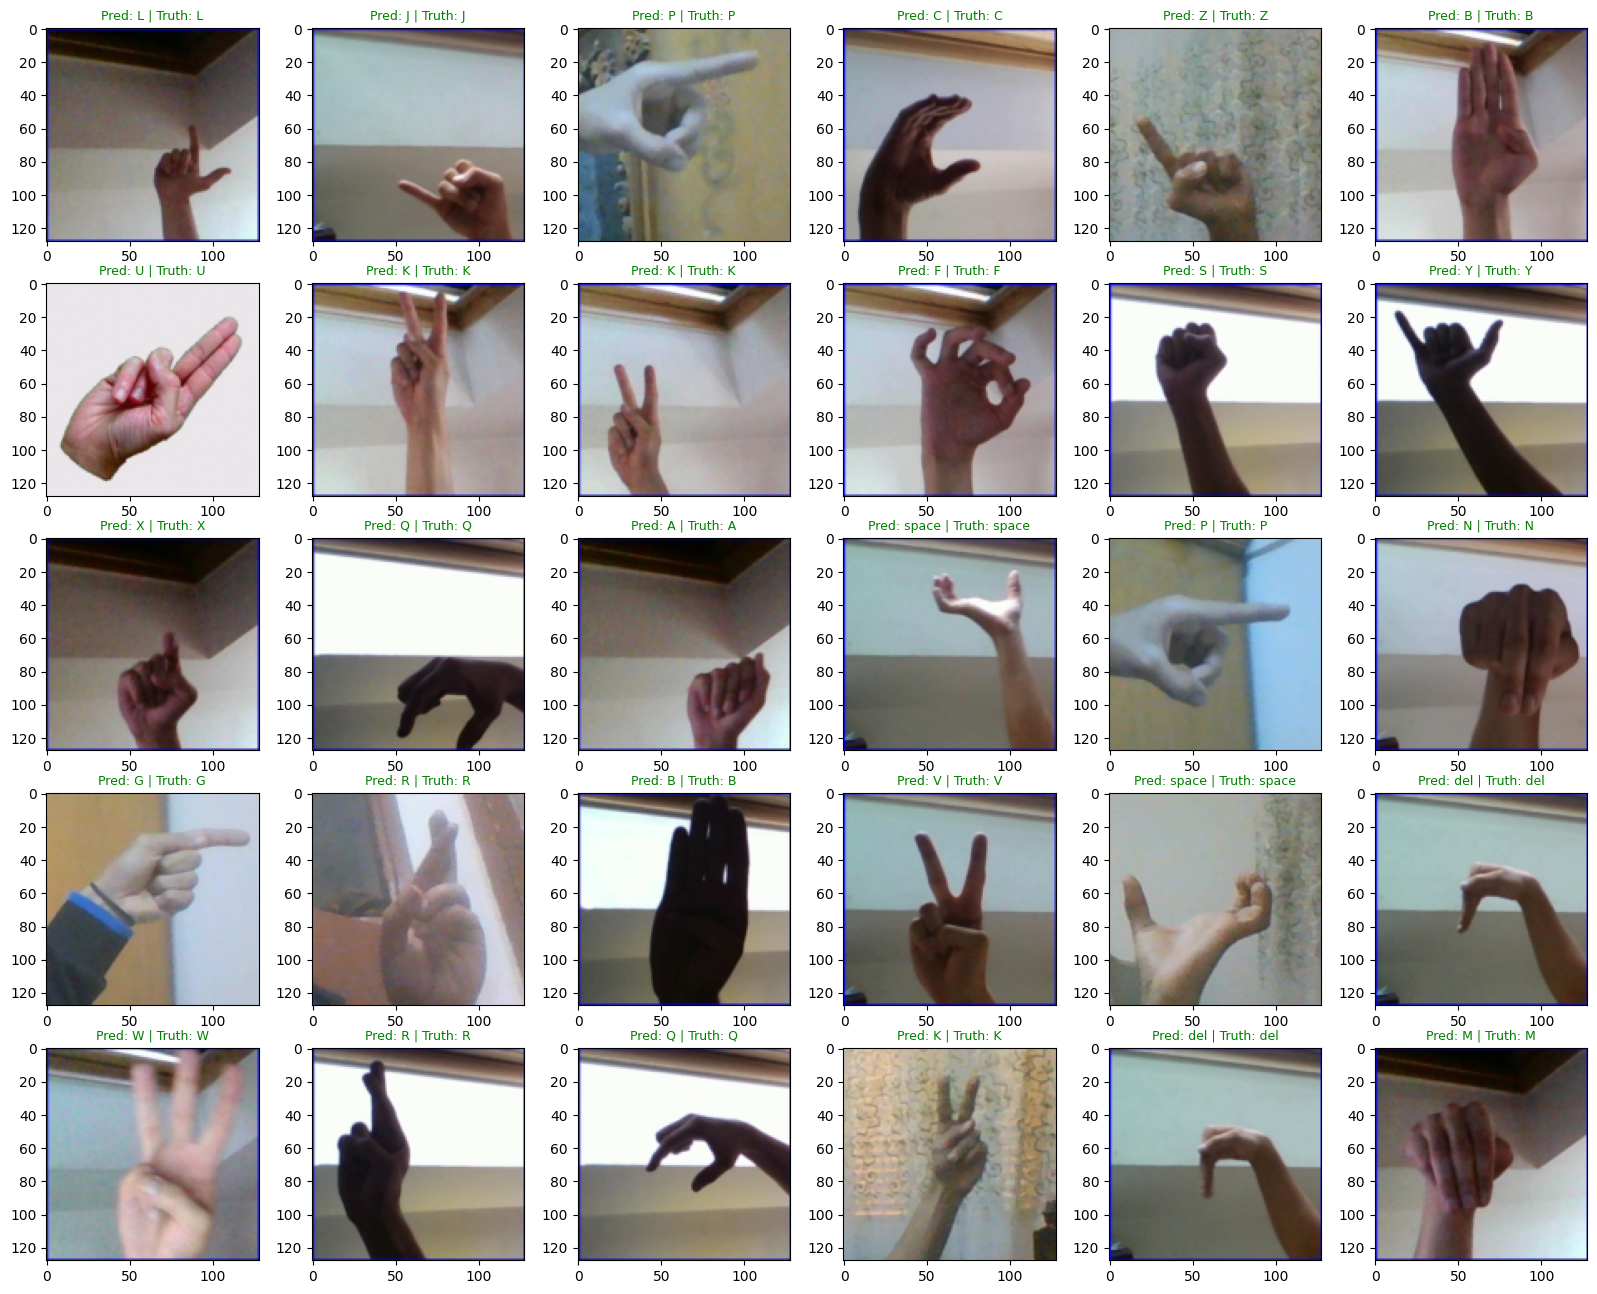

In [41]:
plt.figure(figsize=(20, 16))
nrows, ncols = 5, 6

for i, sample in enumerate(test_samples):
  class_name = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                      'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
                      'del', 'nothing', 'space'])
  plt.subplot(nrows, ncols, i + 1)
  normalized_sample = sample.permute(1, 2, 0).numpy()
  # normalized_sample = normalized_sample / 255.0
  plt.imshow(normalized_sample)

  pred_label = class_name[loaded_pred_classes[i]]
  truth_label = class_name[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"  
    
  if pred_label == truth_label:
      plt.title(title_text, fontsize=9, c="g")
  else:
      plt.title(title_text, fontsize=9, c="r")


### Try predicting with a random image

Random image path: asl_dataset\Train\O\O (3733).jpg
Image Class: O
Image Height: 200
Image Width: 200


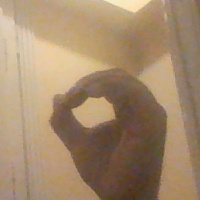

In [42]:
# random.seed(42)
image_path = Path("asl_dataset")
image_path_list = list(image_path.glob("*/*/*.jpg"))
# print(len(image_path_list))
random_image_path = random.choice(image_path_list)
# print(random_image_path)
# the image class is the name of the directory where iamges resides
image_class = random_image_path.parent.stem
# print(image_class)

img = Image.open(random_image_path)

# Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image Height: {img.height}')
print(f'Image Width: {img.width}')
img

In [36]:
# # Visualizing using matplotliib (img in PIL format)
# def show_image(img):
#     # Turn the image into an array
#     img_as_array = np.asarray(img)

#     # Plot the image with matplotlib
#     fig = plt.figure(figsize=(6, 5))
#     plt.imshow(img_as_array)
#     plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]", fontsize = 10)
#     plt.axis(False)
#     plt.show()
# show_image(img)

In [44]:
def make_prediction(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
      sample = data.to(device)  # Chuyển dữ liệu lên thiết bị
      pred_logit = model(sample.unsqueeze(0))  # Thêm chiều batch và đưa vào mô hình
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)  # Dự đoán và tính softmax
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [45]:
# Transform image
data_transform = transforms.Compose([
    transforms.Resize(size = (128, 128)),         # Resize our images to 224x224
    transforms.ToTensor()
])

transformed_data = data_transform(img)
transformed_data, transformed_data.shape, transformed_data.dtype

(tensor([[[0.7294, 0.7333, 0.7294,  ..., 0.5098, 0.4902, 0.4902],
          [0.7373, 0.7373, 0.7373,  ..., 0.5294, 0.4980, 0.4863],
          [0.7451, 0.7373, 0.7373,  ..., 0.5333, 0.5020, 0.4863],
          ...,
          [0.6431, 0.6431, 0.6431,  ..., 0.6196, 0.6078, 0.5843],
          [0.6353, 0.6353, 0.6353,  ..., 0.6275, 0.6196, 0.5843],
          [0.6314, 0.6314, 0.6353,  ..., 0.6353, 0.6157, 0.5765]],
 
         [[0.6471, 0.6510, 0.6510,  ..., 0.4000, 0.3922, 0.3961],
          [0.6510, 0.6510, 0.6549,  ..., 0.4196, 0.4000, 0.3961],
          [0.6549, 0.6510, 0.6510,  ..., 0.4275, 0.4039, 0.3961],
          ...,
          [0.5412, 0.5373, 0.5412,  ..., 0.4941, 0.4784, 0.4549],
          [0.5373, 0.5373, 0.5373,  ..., 0.4941, 0.4824, 0.4510],
          [0.5412, 0.5451, 0.5451,  ..., 0.4980, 0.4784, 0.4431]],
 
         [[0.5373, 0.5333, 0.5255,  ..., 0.3529, 0.3529, 0.3647],
          [0.5608, 0.5529, 0.5412,  ..., 0.3529, 0.3412, 0.3451],
          [0.5765, 0.5647, 0.5529,  ...,

In [46]:
class_name = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                      'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
                      'del','nothing', 'space'])

loaded_pred_prob = make_prediction(loaded_model,
                                    transformed_data,
                                    device)

loaded_pred_class = loaded_pred_prob.argmax(dim = 1)
pred_label = class_name[loaded_pred_class]
pred_label

'O'

### Now it's real-time testing

In [47]:
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)

In [49]:
class_name = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                      'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
                      'del', 'nothing', 'space'])

data_transform = transforms.Compose([
                transforms.Resize(size = (128, 128)),         # Resize our images to 224x224
                transforms.ToTensor()
            ])

Predict probability from input image

In [48]:
def make_prediction(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
      sample = data.to(device)  
      pred_logit = model(sample.unsqueeze(0))  
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) 
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [51]:
def label_extraction(model, img, device='cpu'):   
    transformed_img = data_transform(img)

    loaded_pred_prob = make_prediction(model,
                            transformed_img,
                            device)

    loaded_pred_class = loaded_pred_prob.argmax(dim = 1)
    return class_name[loaded_pred_class]

In [52]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.8) as hands:
    while cap.isOpened():
        data_aux = []
        x_ = []
        y_ = []

        ret, frame = cap.read()
        H, W, _ = frame.shape

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb = cv2.flip(frame_rgb, 1)
        frame_rgb.flags.writeable = False
        results = hands.process(frame_rgb)
        frame_rgb.flags.writeable = True
        frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
        
        frame = Image.fromarray(frame_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)
                    x_.append(x)
                    y_.append(y)

            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10

            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            # Ký hiệu được xuất ra
            # prediction = model.predict([np.array(data_aux)[0:42]])[0]
            
            prediction = label_extraction(loaded_model, frame)

            # Hiển thị bounding box và dự đoán ký hiệu
            cv2.rectangle(frame_rgb, (x1, y1 - 10), (x2, y2), (255, 99, 173), 6)
            cv2.putText(frame_rgb, prediction, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 5, (255, 0, 0), 5, cv2.LINE_AA)

        cv2.imshow('frame', frame_rgb)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
